### Feature Scaling

- Feature Scaling is a technique to standardize the independant feature present in data in a fixed range.
- It is performed during data processing.

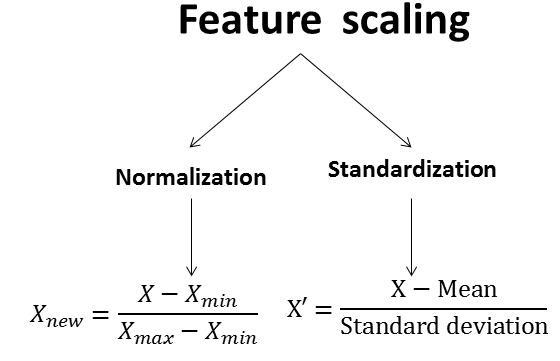

#### 1.Min-Max Normalization

- It is technique scales features values with distribution value between 0 and 1.
- Formula:
    X_New = (xi-x_min)/(x_max-x_min)

#### 2.Standardization

- It is technique which rescales the independant feature disribution value with 0 mean and variance equals to 1.
- Formula: X_New = (xi-x.mean())/(std div())

#### Explanation

- While predicting model,we have huge amount of data. i.e. Dependant feature and independant feature. In ML we try to predict dependant feature based on independant feature. For independant feature have two important feature Unit and Magnitude.
- Suppose we have data related Person_details. independant feature like Name,Age,Height,Weight,Salary.If we take Age then what we get is Age may be Years Or days. e.g 25Years. So here 25 is magnitude and Years is Unit. If we have huge amount of data the age may be Days and Years,Months (25Years, 9460days). Then while predicting model ML algorithm will consider this big no. as usual.Then Feature Scaling comes into the picture.
- By using Feature Scaling we scales down this feature. In Min-Max Normalization the independant feature rescales distribution values with 0 and 1. and in case of Standardization we rescales down this feature distribution values with 0 mean and standard div = 1.
- In Decision Tree (DT) there's no need to feature scaling. because in DT based upon condition branches are created.
- We use DT in Linear Regression in Gradient Descent. to find global minima Point. talking about images (0-255px) here also we can use Feature Scaling.


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
17,15617482,Male,45,26000,1
350,15800515,Female,38,113000,1
334,15814553,Male,57,60000,1
245,15722061,Female,51,146000,1
98,15575694,Male,35,73000,0


In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
g = df[[col for col in df.columns if col in ['Gender']]]
g.tail()

,Gender
395,Female
396,Male
397,Female
398,Male
399,Female


In [7]:
ob = OrdinalEncoder(categories=[['Male', 'Female']])

In [8]:
ob.fit(g)

OrdinalEncoder(categories=[['Male', 'Female']])

In [9]:
ob.transform(g)

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [10]:
df = pd.concat([df,pd.DataFrame(ob.transform(g),columns=['En_gen'])],axis=1)

In [11]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,En_gen
347,15768151,Female,54,108000,1,1.0
386,15724150,Female,49,39000,1,1.0
185,15814816,Male,31,66000,0,0.0
12,15746139,Male,20,86000,0,0.0
45,15639277,Male,23,20000,0,0.0


In [12]:
df.drop(columns=['User ID','Gender'],axis=1,inplace=True)
df.head()

,Age,EstimatedSalary,Purchased,En_gen
0,19,19000,0,0.0
1,35,20000,0,0.0
2,26,43000,0,1.0
3,27,57000,0,1.0
4,19,76000,0,0.0


In [13]:
X = df[[col for col in df.columns if col not in  ['Purchased']]]
X.head()

,Age,EstimatedSalary,En_gen
0,19,19000,0.0
1,35,20000,0.0
2,26,43000,1.0
3,27,57000,1.0
4,19,76000,0.0


In [15]:
y = df[[col for col in df.columns if col in ['Purchased']]]
y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [17]:
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X_train (280, 3)
Size_of X_test (120, 3)
Size_of y_train (280, 1)
Size_of y_test (120, 1)


##### For Standardization

In [18]:
Scaler = StandardScaler()

In [19]:
Scaler.fit(X_train)

StandardScaler()

In [22]:
X_Scale_train = Scaler(X_train)
X_Scale_test = Scaler(X_test)

TypeError: 'StandardScaler' object is not callable